In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_pickle('data/pickles/carpols_15min_normalized.pkl')
print('{} échantillons'.format(str(len(df))))
df.head()

19039 échantillons


,date,humidity,temperature,pressure,t_grad,so2_ref,h2s_ref,h2s,captor_id
0,2016-05-23 08:15:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,7.6,1303
1,2016-05-23 08:30:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,14.1,1303
2,2016-05-23 08:45:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,14.9,1303
3,2016-05-23 09:00:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,15.0,1303
4,2016-05-23 09:15:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,14.9,1303


In [4]:
def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy_with_ref(df):
    return (np.array(df[['h2s_ref', 'pressure', 'temperature', 'humidity', 't_grad', 'h2s']]),\
            np.array(df['so2_ref']))

def dataframe_to_xy_without_ref(df):
    return (np.array(df[['pressure', 'temperature', 'humidity', 't_grad', 'h2s']]),\
            np.array(df['so2_ref']))

df = df.reset_index()
df = df.reindex(np.random.permutation(df.index))
print('{} échantillons'.format(str(len(df))))

14936 échantillons


In [5]:
df_test, df_train = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

In [6]:
df_train.head()

,index,date,humidity,temperature,pressure,t_grad,so2_ref,h2s_ref,h2s,captor_id
3638,3638,2016-05-26 07:15:00,-1.888923,1.003809,-0.410357,-0.189469,4.1,0.4,12.7,1304
12220,12220,2016-08-26 02:15:00,0.642222,0.308902,-0.410357,1.631116,0.8,0.3,0.0,1304
16061,16061,2016-10-05 23:45:00,-0.689959,-1.428366,0.979818,0.590782,0.0,0.0,0.5,1304
12992,12992,2016-09-03 07:15:00,0.575613,-0.038552,0.361963,-0.189469,0.8,0.0,0.9,1304
9673,9673,2016-07-29 21:00:00,-0.023869,-0.038552,-0.564821,0.070615,0.4,0.3,1.5,1304


## Learning

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

def baseline_model(dense_size, input_dim, loss_function, optimizer):
    # create model
    model = Sequential()
    model.add(Dense(dense_size, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss=loss_function, optimizer=optimizer)
    model.summary()
    return model

Using TensorFlow backend.


In [18]:
X_train, y_train = dataframe_to_xy_with_ref(df_train)
X_valid, y_valid = dataframe_to_xy_with_ref(df_valid)
X_test, y_test = dataframe_to_xy_with_ref(df_test)

In [19]:
model = baseline_model(32, X_train.shape[1], 'mse', 'adagrad')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=2000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
Train on 7468 samples, validate on 3734 samples
Epoch 1/2000
7468/7468 [==============================] - 0s - loss: 79.5149 - val_loss: 70.6443
Epoch 2/2000
7468/7468 [==============================] - 0s - loss: 74.9263 - val_loss: 69.1956
Epoch 3/2000
7468/7468 [==============================] - 0s - loss: 73.2164 - val_loss: 68.2667
Epoch 4/2000
7468/7468 [==============================] - 0s - loss: 71.9535 - val_loss: 67.4514
Epoch 5/2000
7468/7468 [==============================] - 0s - loss: 70.8448 - val_loss: 66.7446
Epoch 6

7468/7468 [==============================] - 0s - loss: 39.8139 - val_loss: 50.4505
Epoch 162/2000
7468/7468 [==============================] - 0s - loss: 39.7629 - val_loss: 50.4342
Epoch 163/2000
7468/7468 [==============================] - 0s - loss: 39.7078 - val_loss: 50.4273
Epoch 164/2000
7468/7468 [==============================] - 0s - loss: 39.6548 - val_loss: 50.4119
Epoch 165/2000
7468/7468 [==============================] - 0s - loss: 39.6015 - val_loss: 50.3969
Epoch 166/2000
7468/7468 [==============================] - 0s - loss: 39.5514 - val_loss: 50.3808
Epoch 167/2000
7468/7468 [==============================] - 0s - loss: 39.4998 - val_loss: 50.3762
Epoch 168/2000
7468/7468 [==============================] - 0s - loss: 39.4529 - val_loss: 50.3635
Epoch 169/2000
7468/7468 [==============================] - 0s - loss: 39.3917 - val_loss: 50.3319
Epoch 170/2000
7468/7468 [==============================] - 0s - loss: 39.3462 - val_loss: 50.3331
Epoch 171/2000
7468/7468 

7468/7468 [==============================] - 0s - loss: 34.6786 - val_loss: 49.4400
Epoch 326/2000
7468/7468 [==============================] - 0s - loss: 34.6618 - val_loss: 49.4362
Epoch 327/2000
7468/7468 [==============================] - 0s - loss: 34.6452 - val_loss: 49.4381
Epoch 328/2000
7468/7468 [==============================] - 0s - loss: 34.6283 - val_loss: 49.4519
Epoch 329/2000
7468/7468 [==============================] - 0s - loss: 34.6120 - val_loss: 49.4459
Epoch 330/2000
7468/7468 [==============================] - 0s - loss: 34.5944 - val_loss: 49.4374
Epoch 331/2000
7468/7468 [==============================] - 0s - loss: 34.5785 - val_loss: 49.4388
Epoch 332/2000
7468/7468 [==============================] - 0s - loss: 34.5650 - val_loss: 49.4384
Epoch 333/2000
7468/7468 [==============================] - 0s - loss: 34.5491 - val_loss: 49.4405
Epoch 334/2000
7468/7468 [==============================] - 0s - loss: 34.5310 - val_loss: 49.4402
Epoch 335/2000
7468/7468 

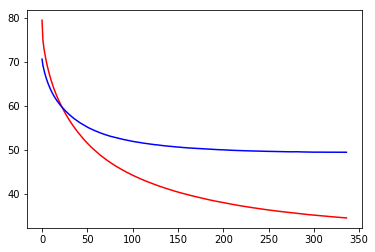

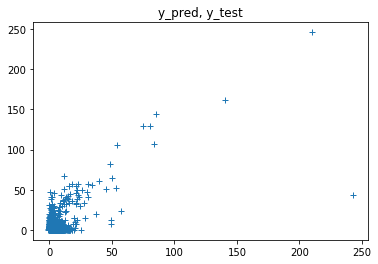

0.458823529412


In [20]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()
percent_high_detected = np.sum(y_pred.reshape((len(y_pred), )) > 20) / np.sum(y_test.reshape((len(y_test), )) > 20)
print(percent_high_detected)

In [21]:
X_train, y_train = dataframe_to_xy_without_ref(df_train)
X_valid, y_valid = dataframe_to_xy_without_ref(df_valid)
X_test, y_test = dataframe_to_xy_without_ref(df_test)

In [22]:
model = baseline_model(32, X_train.shape[1], 'mse', 'adagrad')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=2000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
Train on 7468 samples, validate on 3734 samples
Epoch 1/2000
7468/7468 [==============================] - 0s - loss: 82.1087 - val_loss: 71.1261
Epoch 2/2000
7468/7468 [==============================] - 0s - loss: 75.9427 - val_loss: 69.2878
Epoch 3/2000
7468/7468 [==============================] - 0s - loss: 73.7597 - val_loss: 68.1120
Epoch 4/2000
7468/7468 [==============================] - 0s - loss: 71.9921 - val_loss: 67.0476
Epoch 5/2000
7468/7468 [==============================] - 0s - loss: 70.3346 - val_loss: 66.1980
Epoch 6

7468/7468 [==============================] - 0s - loss: 35.2928 - val_loss: 50.7923
Epoch 162/2000
7468/7468 [==============================] - 0s - loss: 35.2522 - val_loss: 50.7989
Epoch 163/2000
7468/7468 [==============================] - 0s - loss: 35.2196 - val_loss: 50.7800
Epoch 164/2000
7468/7468 [==============================] - 0s - loss: 35.1810 - val_loss: 50.7902
Epoch 165/2000
7468/7468 [==============================] - 0s - loss: 35.1446 - val_loss: 50.7731
Epoch 166/2000
7468/7468 [==============================] - 0s - loss: 35.1078 - val_loss: 50.8101
Epoch 167/2000
7468/7468 [==============================] - 0s - loss: 35.0700 - val_loss: 50.8102
Epoch 00166: early stopping


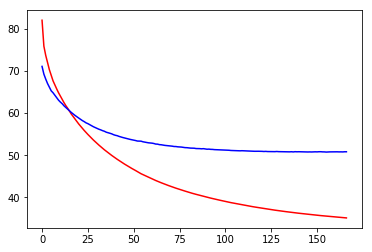

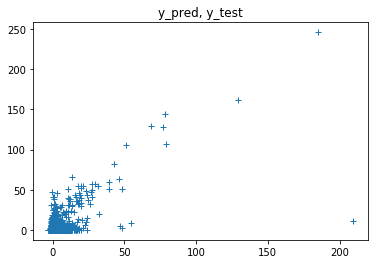

0.41975308642


In [23]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()
percent_high_detected = np.sum(y_pred.reshape((len(y_pred), )) > 20) / np.sum(y_test.reshape((len(y_test), )) > 20)
print(percent_high_detected)

In [14]:
def dataframe_to_xy_with_ref(df):
    return (np.array(df[['pressure', 'temperature', 'humidity', 't_grad', 'h2s']]),\
            np.array(df['so2_ref'] + df['h2s_ref']))

In [24]:
X_train, y_train = dataframe_to_xy_with_ref(df_train)
X_valid, y_valid = dataframe_to_xy_with_ref(df_valid)
X_test, y_test = dataframe_to_xy_with_ref(df_test)

In [25]:
model = baseline_model(32, X_train.shape[1], 'mse', 'adagrad')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=2000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
Train on 7468 samples, validate on 3734 samples
Epoch 1/1000
7468/7468 [==============================] - 0s - loss: 81.0674 - val_loss: 71.2249
Epoch 2/1000
7468/7468 [==============================] - 0s - loss: 75.7393 - val_loss: 69.6571
Epoch 3/1000
7468/7468 [==============================] - 0s - loss: 74.0790 - val_loss: 68.5676
Epoch 4/1000
7468/7468 [==============================] - 0s - loss: 72.5206 - val_loss: 67.7030
Epoch 5/1000
7468/7468 [==============================] - 0s - loss: 71.2923 - val_loss: 66.9019
Epoch 6

7468/7468 [==============================] - 0s - loss: 37.5252 - val_loss: 49.1626
Epoch 162/1000
7468/7468 [==============================] - 0s - loss: 37.4826 - val_loss: 49.1757
Epoch 163/1000
7468/7468 [==============================] - 0s - loss: 37.4396 - val_loss: 49.1734
Epoch 164/1000
7468/7468 [==============================] - 0s - loss: 37.3927 - val_loss: 49.1789
Epoch 165/1000
7468/7468 [==============================] - 0s - loss: 37.3457 - val_loss: 49.1337
Epoch 166/1000
7468/7468 [==============================] - 0s - loss: 37.3102 - val_loss: 49.1425
Epoch 167/1000
7468/7468 [==============================] - 0s - loss: 37.2604 - val_loss: 49.1524
Epoch 168/1000
7468/7468 [==============================] - 0s - loss: 37.2271 - val_loss: 49.1287
Epoch 169/1000
7468/7468 [==============================] - 0s - loss: 37.1843 - val_loss: 49.1204
Epoch 170/1000
7468/7468 [==============================] - 0s - loss: 37.1423 - val_loss: 49.1227
Epoch 171/1000
7468/7468 

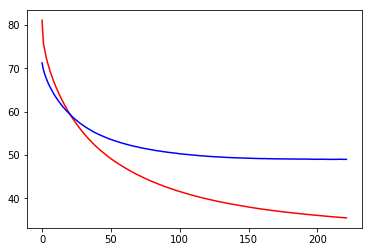

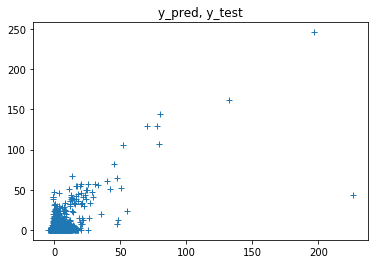

0.470588235294


In [26]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()
percent_high_detected = np.sum(y_pred.reshape((len(y_pred), )) > 20) / np.sum(y_test.reshape((len(y_test), )) > 20)
print(percent_high_detected)